# World food and Feed Production from 1961 to 2013
We use two datasets: 
1. Kaggle dataset based on FAO statistics - [world food/feed production](https://www.kaggle.com/dorbicycle/world-foodfeed-production) 
2. Kaggle dataset on world population by country - [World Population 1960-2018](https://www.kaggle.com/imdevskp/world-population-19602018)

import the libraries

In [1]:
from hdx.location.country import Country
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read population dataset

In [2]:
popn = pd.read_csv("./data/population_total_long.csv", encoding='latin1')

In [3]:
popn.columns

Index(['Country Name', 'Year', 'Count'], dtype='object')

In [4]:
popn.head(10)

,Country Name,Year,Count
0,Aruba,1960,54211
1,Afghanistan,1960,8996973
2,Angola,1960,5454933
3,Albania,1960,1608800
4,Andorra,1960,13411
5,United Arab Emirates,1960,92418
6,Argentina,1960,20481779
7,Armenia,1960,1874121
8,American Samoa,1960,20123
9,Antigua and Barbuda,1960,54131


Country name can be a bit tricky to match. Get the ISO3 names of all possible countries

In [5]:
popncn=list(set(list(popn['Country Name']))) # get unique list of country names
popncn.sort() # sort - optional!
isolist={name:Country.get_iso3_country_code_fuzzy(name)[0] for name in popncn} # use hdx location country to get ISO3
# Print countries that could not be matched
{k:v for (k,v) in isolist.items() if not v}

{'Caribbean small states': None,
 'Channel Islands': None,
 'Kosovo': None,
 'Pacific island small states': None}

For the moment we can ignore those. 

Now use this dictionry to set ISO3 names in the original dataframe

In [6]:
# Helper function
def getISO3(name):
    return isolist[name]


In [10]:
popn['Abbrev']=popn['Country Name'].apply(getISO3)

In [11]:
popn.head(10)

,Country Name,Year,Count,Abbrev
0,Aruba,1960,54211,ABW
1,Afghanistan,1960,8996973,AFG
2,Angola,1960,5454933,AGO
3,Albania,1960,1608800,ALB
4,Andorra,1960,13411,AND
5,United Arab Emirates,1960,92418,ARE
6,Argentina,1960,20481779,ARG
7,Armenia,1960,1874121,ARM
8,American Samoa,1960,20123,ASM
9,Antigua and Barbuda,1960,54131,ATG


Now open the FAO dataset

In [12]:
fao_ = pd.read_csv("./data/FAO.csv", encoding='latin1')

In [13]:
fao_.head(10)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
5,AFG,2,Afghanistan,2514,Maize and products,5142,Food,1000 tonnes,33.94,67.71,...,231.0,67.0,82.0,67.0,69.0,71.0,82.0,73.0,77,76
6,AFG,2,Afghanistan,2517,Millet and products,5142,Food,1000 tonnes,33.94,67.71,...,15.0,21.0,11.0,19.0,21.0,18.0,14.0,14.0,14,12
7,AFG,2,Afghanistan,2520,"Cereals, Other",5142,Food,1000 tonnes,33.94,67.71,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
8,AFG,2,Afghanistan,2531,Potatoes and products,5142,Food,1000 tonnes,33.94,67.71,...,276.0,294.0,294.0,260.0,242.0,250.0,192.0,169.0,196,230
9,AFG,2,Afghanistan,2536,Sugar cane,5521,Feed,1000 tonnes,33.94,67.71,...,50.0,29.0,61.0,65.0,54.0,114.0,83.0,83.0,69,81


Data is in 'Wide' format. Let's convert it to 'Long' format. 

In [34]:
# convert it to long format
fao_['id']=fao_.index
fao=pd.wide_to_long(fao_, stubnames=['Y'], i='id', j='Year')
#rename the 'Y' column to a more meaningful name
fao.rename(columns = {'Y':'Mil_Kg'}, inplace = True)
# save a subset for inspection
fao.head(1000).to_csv('./tmp/fao_stub.csv') # inspect in a spreadsheet

In [17]:
fao.head(10)

,,Item Code,Element,Unit,latitude,Element Code,Item,Area Abbreviation,longitude,Area,Area Code,Mil_Kg
id,Year,,,,,,,,,,,
0,1961,2511,Food,1000 tonnes,33.94,5142,Wheat and products,AFG,67.71,Afghanistan,2,1928.0
1,1961,2805,Food,1000 tonnes,33.94,5142,Rice (Milled Equivalent),AFG,67.71,Afghanistan,2,183.0
2,1961,2513,Feed,1000 tonnes,33.94,5521,Barley and products,AFG,67.71,Afghanistan,2,76.0
3,1961,2513,Food,1000 tonnes,33.94,5142,Barley and products,AFG,67.71,Afghanistan,2,237.0
4,1961,2514,Feed,1000 tonnes,33.94,5521,Maize and products,AFG,67.71,Afghanistan,2,210.0
5,1961,2514,Food,1000 tonnes,33.94,5142,Maize and products,AFG,67.71,Afghanistan,2,403.0
6,1961,2517,Food,1000 tonnes,33.94,5142,Millet and products,AFG,67.71,Afghanistan,2,17.0
7,1961,2520,Food,1000 tonnes,33.94,5142,"Cereals, Other",AFG,67.71,Afghanistan,2,0.0
8,1961,2531,Food,1000 tonnes,33.94,5142,Potatoes and products,AFG,67.71,Afghanistan,2,111.0


See how many countries in the primary (FAO) dataset are not matched by population dataset. 

In [26]:
areas=fao.groupby(['Area', 'Area Abbreviation']).count().reset_index()
areas.head(20)

,Area,Area Abbreviation,Item Code,Element,Unit,latitude,Element Code,Item,longitude,Area Code,Mil_Kg
0,Afghanistan,AFG,4399,4399,4399,4399,4399,4399,4399,4399,4399
1,Albania,ALB,6519,6519,6519,6519,6519,6519,6519,6519,6519
2,Algeria,DZA,6572,6572,6572,6572,6572,6572,6572,6572,6572
3,Angola,AGO,5777,5777,5777,5777,5777,5777,5777,5777,5777
4,Antigua and Barbuda,ATG,6201,6201,6201,6201,6201,6201,6201,6201,6201
5,Argentina,ARG,6519,6519,6519,6519,6519,6519,6519,6519,6519
6,Armenia,ARM,7049,7049,7049,7049,7049,7049,7049,7049,2926
7,Australia,AUS,6784,6784,6784,6784,6784,6784,6784,6784,6784
8,Austria,AUT,7367,7367,7367,7367,7367,7367,7367,7367,7367
9,Azerbaijan,AZE,6572,6572,6572,6572,6572,6572,6572,6572,2728


In [27]:
abr=list(set(list(popn['Abbrev'])))
areas[~areas['Area Abbreviation'].isin(abr)]

,Area,Area Abbreviation,Item Code,Element,Unit,latitude,Element Code,Item,longitude,Area Code,Mil_Kg


Great! All the countries are matched. Time to do an inner-join to make a merged dataset. 

In [28]:
food=pd.merge(popn, fao, left_on=['Abbrev','Year'], how='inner', right_on=['Area Abbreviation', 'Year'])

# clean up 
food.drop(columns=['Area Abbreviation', 'Unit'])
food.rename(columns = {'Count':'Population', 'Abbrev': 'CountryISO3'}, inplace = True)

In [29]:
food.head(10)

,Country Name,Year,Population,CountryISO3,Item Code,Element,Unit,latitude,Element Code,Item,Area Abbreviation,longitude,Area,Area Code,Mil_Kg
0,Afghanistan,1961,9169410,AFG,2511,Food,1000 tonnes,33.94,5142,Wheat and products,AFG,67.71,Afghanistan,2,1928.0
1,Afghanistan,1961,9169410,AFG,2805,Food,1000 tonnes,33.94,5142,Rice (Milled Equivalent),AFG,67.71,Afghanistan,2,183.0
2,Afghanistan,1961,9169410,AFG,2513,Feed,1000 tonnes,33.94,5521,Barley and products,AFG,67.71,Afghanistan,2,76.0
3,Afghanistan,1961,9169410,AFG,2513,Food,1000 tonnes,33.94,5142,Barley and products,AFG,67.71,Afghanistan,2,237.0
4,Afghanistan,1961,9169410,AFG,2514,Feed,1000 tonnes,33.94,5521,Maize and products,AFG,67.71,Afghanistan,2,210.0
5,Afghanistan,1961,9169410,AFG,2514,Food,1000 tonnes,33.94,5142,Maize and products,AFG,67.71,Afghanistan,2,403.0
6,Afghanistan,1961,9169410,AFG,2517,Food,1000 tonnes,33.94,5142,Millet and products,AFG,67.71,Afghanistan,2,17.0
7,Afghanistan,1961,9169410,AFG,2520,Food,1000 tonnes,33.94,5142,"Cereals, Other",AFG,67.71,Afghanistan,2,0.0
8,Afghanistan,1961,9169410,AFG,2531,Food,1000 tonnes,33.94,5142,Potatoes and products,AFG,67.71,Afghanistan,2,111.0
9,Afghanistan,1961,9169410,AFG,2536,Feed,1000 tonnes,33.94,5521,Sugar cane,AFG,67.71,Afghanistan,2,45.0


Let's look at the whole world

[None]

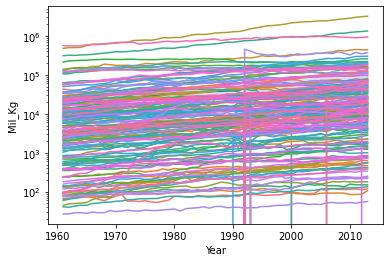

In [31]:
sns.lineplot(x="Year", y="Mil_Kg", data=total_food)
ax=sns.lineplot(x="Year", y="Mil_Kg", hue="Area", data=total_food)
ax.get_legend().remove()
ax.set(yscale='log')

Not very useful. 

Let's plot some selected countries. 

[None]

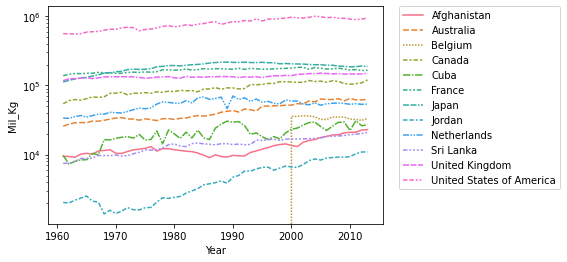

In [33]:
# that graph is not very meaningful. Let's plot some selected countries
samplect=['Afghanistan',
 'Australia',
 'Belgium',
 'Canada',
 #'Central African Republic',
 'Cuba',
 #'Fiji',
 'France',
 #'Honduras',
 'Japan',
 'Jordan',
 #'Malaysia',
 'Netherlands',
 #'Pakistan',
 'Sri Lanka',
 #'United Arab Emirates',
 'United Kingdom',
 'United States of America',
 #'Uruguay',
 #'Zambia',
 ]
sampled=fao[fao['Area'].isin(samplect)].groupby(['Year', 'Area']).sum().reset_index()

ax=sns.lineplot(x="Year", y="Mil_Kg", hue="Area", style="Area",
             data=sampled)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(yscale='log')

Get the totals for the whole world. 

How about the population